In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/houses.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10082 non-null  int64  
 1   Location             10082 non-null  object 
 2   Property type        10082 non-null  object 
 3   Property subtype     10082 non-null  object 
 4   Price                9958 non-null   float64
 5   Type of sale         10082 non-null  object 
 6   Number of bedrooms   9970 non-null   float64
 7   Living area          7750 non-null   float64
 8   Kitchen              9285 non-null   object 
 9   Furnished            7084 non-null   object 
 10  Open fireplace       10082 non-null  bool   
 11  Terrace              10082 non-null  object 
 12  Terrace orientation  10082 non-null  object 
 13  Garden               10082 non-null  object 
 14  Garden orientation   10082 non-null  object 
 15  Surface area land    9970 non-null  

In [5]:
df.head()

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
0,0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN


# Cleaning

## Price cleaning

In [3]:
df['Price'].isna().sum()

124

In [4]:
df = df.dropna(subset=['Price'])
df['Price'].isna().sum()

0

In [5]:
(df['Price']<100).sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

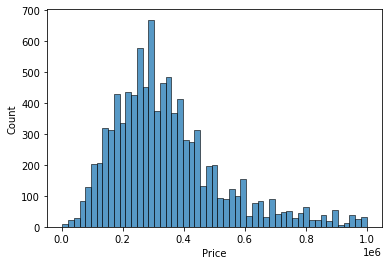

In [6]:
sns.histplot(df[df['Price']<1000000]['Price'])

In [7]:
df['Price_log'] = df['Price'].apply(np.log)

## Exploration of simple data frame

In [15]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition'],
      dtype='object')

In [8]:
df_simple = df[['Surface area land','Living area','Price']]

In [9]:
df_simple.isna().sum()

Surface area land       0
Living area          2219
Price                   0
dtype: int64

In [10]:
df_simple = df_simple.dropna()
df_simple = df_simple[df_simple['Surface area land'] >1]

In [11]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 10080
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Surface area land  6987 non-null   float64
 1   Living area        6987 non-null   float64
 2   Price              6987 non-null   float64
dtypes: float64(3)
memory usage: 218.3 KB


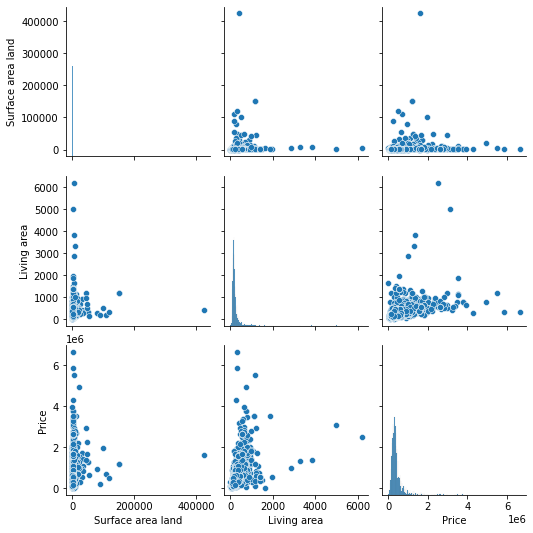

In [105]:
# sns.pairplot(df_simple)

/Users/wvdvijve/.pyenv/versions/3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surface area land'>

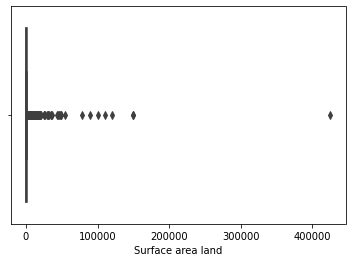

In [106]:
# sns.boxplot(df_simple['Surface area land'])

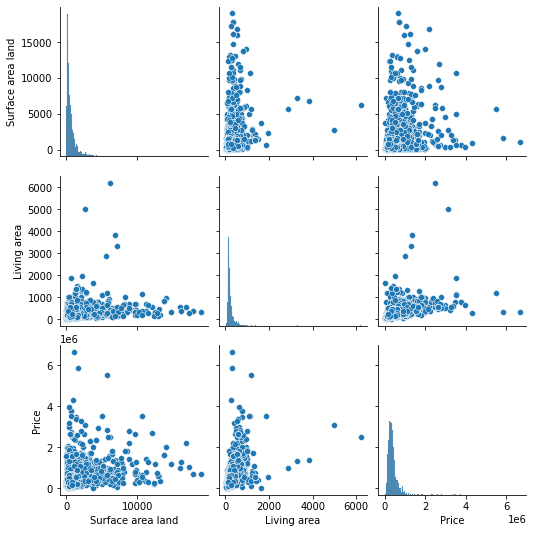

In [61]:
# sns.pairplot(df_simple[df_simple['Surface area land']<20000])

In [12]:
df_simple['Surface_log'] = df_simple['Surface area land'].apply(np.log)
df_simple['Living_log'] = df_simple['Living area'].apply(np.log)
df_simple['Price_log'] = df_simple['Price'].apply(np.log)

In [13]:
df_simple.columns

Index(['Surface area land', 'Living area', 'Price', 'Surface_log',
       'Living_log', 'Price_log'],
      dtype='object')

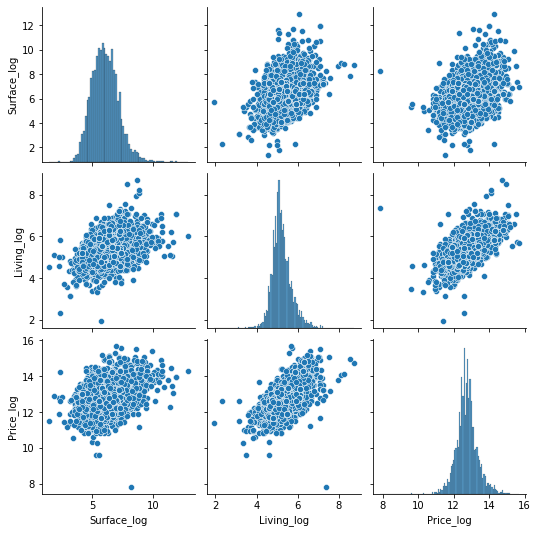

In [111]:
sns.pairplot(df_simple[['Surface_log', 'Living_log',  'Price_log']])

In [123]:
df_simple[['Surface_log', 'Living_log',  'Price_log']].corr()

,Surface_log,Living_log,Price_log
Surface_log,1.000000,0.418617,0.397156
Living_log,0.418617,1.000000,0.669374
Price_log,0.397156,0.669374,1.000000


### Naive linear model

In [116]:
X = df_simple[[ 'Surface area land', 'Living area']]
X_log = df_simple[['Surface_log', 'Living area']]
X_double_log = df_simple[['Surface_log', 'Living_log']]
y = df_simple['Price']
y_log = df_simple['Price_log']

In [113]:
np.log

2.302585092994046

In [14]:
from sklearn.model_selection import train_test_split



def easy_modeler(X, y , model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    this_model = model()
    this_model.fit(X_train, y_train)

    train_score =this_model.score(X_train, y_train)
    test_score =this_model.score(X_test, y_test)

    print(f'The train score is {train_score}')
    print(f'The test score is {test_score}')


In [89]:
easy_modeler(X,y, LinearRegression)

The train score is 0.25686334815642997
The test score is 0.11364231474742648


In [90]:
easy_modeler(X_log, y, LinearRegression)

The train score is 0.2944758917163226
The test score is 0.3341018664540255


In [124]:
easy_modeler(X_double_log, y_log , LinearRegression)

The train score is 0.45856624526829337
The test score is 0.48874420348786396


In [119]:
from sklearn.ensemble import RandomForestRegressor

easy_modeler(X, y, RandomForestRegressor)

The train score is 0.9175294569653237
The test score is 0.3774340075268413


In [118]:
easy_modeler(X_double_log, y_log, RandomForestRegressor)

The train score is 0.9012912040129657
The test score is 0.46533164530809834


In [120]:
easy_modeler(X_double_log, y, RandomForestRegressor)

The train score is 0.9127446880364359
The test score is 0.5069091081780266


In [121]:
from sklearn.svm import SVR

easy_modeler(X, y, SVR)

The train score is -0.05715584602885482
The test score is -0.04932135769131518


In [122]:
easy_modeler(X_double_log, y_log, SVR)

The train score is 0.4982969073698277
The test score is 0.4727976848986897


## Exploration of number of bedrooms

In [126]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition'],
      dtype='object')

In [302]:
df_bedrooms = df[['Number of bedrooms', 'Price', 'Price_log']]

In [303]:
df_bedrooms.isna().sum()

Number of bedrooms    0
Price                 0
Price_log             0
dtype: int64

In [17]:

df_bedrooms = df_bedrooms[(df_bedrooms['Number of bedrooms']<40)]
df_bedrooms = df_bedrooms[df_bedrooms['Number of bedrooms']>=1]

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Price'>

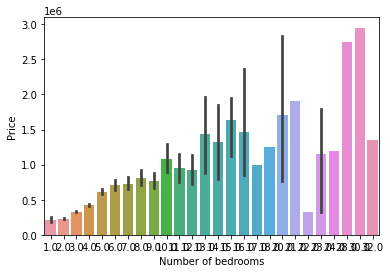

In [18]:
sns.barplot(data=df_bedrooms, x='Number of bedrooms', y='Price')

In [187]:
df_bedrooms.describe()

,Number of bedrooms,Price,Price_log
count,9749.000000,9.749000e+03,9749.000000
mean,3.534414,3.913240e+05,12.673016
std,1.659076,3.333420e+05,0.616469
min,1.000000,2.500000e+03,7.824046
25%,3.000000,2.250000e+05,12.323856
50%,3.000000,3.195000e+05,12.674513
75%,4.000000,4.400000e+05,12.994530
max,32.000000,6.650000e+06,15.710127


In [159]:
df[df['Number of bedrooms']==0]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN,12.611538
59,59,Liège,HOUSE,APARTMENT_BLOCK,1550000.0,residential_sale,0.0,500.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,0.0,2,NaN,AS_NEW,14.253765
76,76,Zeebrugge,HOUSE,HOUSE,388000.0,residential_sale,0.0,NaN,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,0.0,2,False,NaN,12.868761
144,144,Attert (Heinstert,HOUSE,FARMHOUSE,950000.0,residential_sale,0.0,250.0,Unknown,True,False,Unknown,Unknown,Unknown,Unknown,78987.0,4,False,NaN,13.764217
395,395,SINT-JANS-MOLENBEEK,HOUSE,MIXED_USE_BUILDING,795000.0,residential_sale,0.0,650.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,650.0,3,NaN,GOOD,13.586097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9944,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
9973,9973,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
10002,10002,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
10035,10035,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393


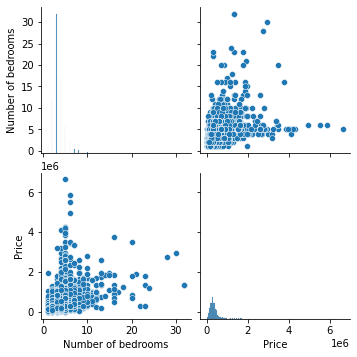

In [19]:
sns.pairplot(df_bedrooms[['Number of bedrooms', 'Price']])

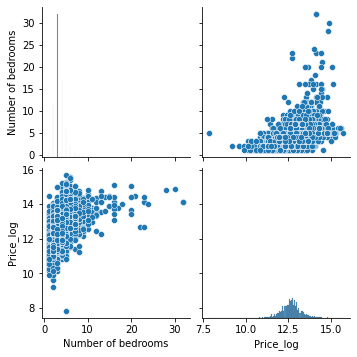

In [20]:
sns.pairplot(df_bedrooms[['Number of bedrooms', 'Price_log']])

In [196]:
df_bedrooms.corr()

,Number of bedrooms,Price,Price_log,bedrooms truncated
Number of bedrooms,1.000000,0.448159,0.456434,0.841414
Price,0.448159,1.000000,0.825792,0.433637
Price_log,0.456434,0.825792,1.000000,0.495881
bedrooms truncated,0.841414,0.433637,0.495881,1.000000


In [194]:
df_bedrooms['bedrooms truncated'] = df_bedrooms['Number of bedrooms'].apply(lambda x: x if x<6 else 6)

### Naive bedroom models

In [197]:
X= df_bedrooms[['Number of bedrooms']]
X_trunc = df_bedrooms[['bedrooms truncated']]
y = df_bedrooms['Price']
y_log = df_bedrooms['Price_log']

In [199]:
easy_modeler(X,y, LinearRegression)
easy_modeler(X,y_log, LinearRegression)

The train score is 0.2143201016576637
The test score is 0.1505234905928312
The train score is 0.2086096432992719
The test score is 0.2071075453754011


In [200]:
easy_modeler(X_trunc,y, LinearRegression)
easy_modeler(X_trunc,y_log, LinearRegression)

The train score is 0.188179422410103
The test score is 0.1873525315205492
The train score is 0.2507612556156663
The test score is 0.22531097670926026


In [201]:
easy_modeler(X,y, RandomForestRegressor)
easy_modeler(X,y_log, RandomForestRegressor)

The train score is 0.22797723008477244
The test score is 0.19897945814471074
The train score is 0.25754195919999523
The test score is 0.2635896301821228


In [202]:
easy_modeler(X_trunc,y, RandomForestRegressor)
easy_modeler(X_trunc,y_log, RandomForestRegressor)

The train score is 0.1973950764513478
The test score is 0.20126119021714894
The train score is 0.25791905563953477
The test score is 0.22348204125626658


## Exploration of property type and sub-type

In [203]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

In [21]:
df_property = df[['Property type', 'Property subtype', 'Price', 'Price_log']]

In [22]:
df_property['Property type'].unique()

array(['HOUSE'], dtype=object)

In [23]:
list_subtypes = list(df_property['Property subtype'].unique())
list_subtypes

['HOUSE',
 'VILLA',
 'APARTMENT_BLOCK',
 'MIXED_USE_BUILDING',
 'MANSION',
 'TOWN_HOUSE',
 'FARMHOUSE',
 'BUNGALOW',
 'EXCEPTIONAL_PROPERTY',
 'COUNTRY_COTTAGE',
 'MANOR_HOUSE',
 'CHALET',
 'CASTLE',
 'OTHER_PROPERTY']

In [24]:
list_subtypes.sort()

In [25]:
list_subtypes

['APARTMENT_BLOCK',
 'BUNGALOW',
 'CASTLE',
 'CHALET',
 'COUNTRY_COTTAGE',
 'EXCEPTIONAL_PROPERTY',
 'FARMHOUSE',
 'HOUSE',
 'MANOR_HOUSE',
 'MANSION',
 'MIXED_USE_BUILDING',
 'OTHER_PROPERTY',
 'TOWN_HOUSE',
 'VILLA']

In [26]:
df_property.groupby('Property subtype').count()

,Property type,Price,Price_log
Property subtype,,,
APARTMENT_BLOCK,509,509,509
BUNGALOW,100,100,100
CASTLE,8,8,8
CHALET,35,35,35
COUNTRY_COTTAGE,80,80,80
EXCEPTIONAL_PROPERTY,129,129,129
FARMHOUSE,31,31,31
HOUSE,7585,7585,7585
MANOR_HOUSE,22,22,22


In [210]:
df_property['Property subtype'].isna().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Property subtype'>

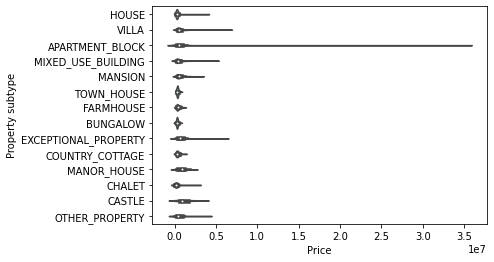

In [27]:
sns.violinplot(data = df_property, y='Property subtype', x='Price' )

<AxesSubplot:xlabel='Price_log', ylabel='Property subtype'>

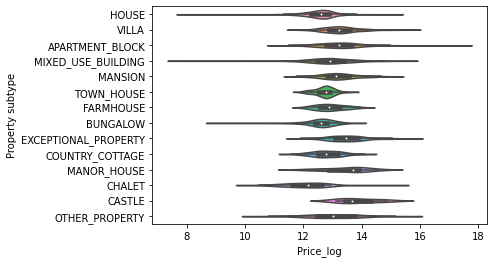

In [28]:
sns.violinplot(data = df_property, y='Property subtype', x='Price_log' )

<AxesSubplot:xlabel='Price_log', ylabel='Count'>

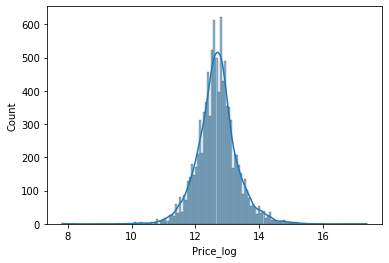

In [217]:
sns.histplot(df_property['Price_log'], kde=True)

In [238]:
def plot_subtype(subtype):
    sns.histplot(df_property[df_property['Property subtype']==subtype]['Price_log'],kde=True)
    plt.title(subtype)

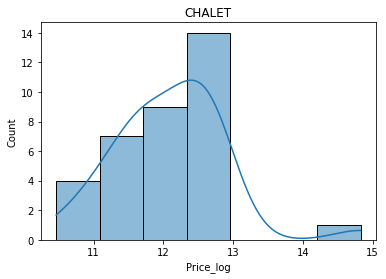

In [245]:
plot_subtype(list_subtypes[11])

In [29]:
df_property_dummies = pd.get_dummies(df_property['Property subtype'])

In [30]:
df_property_dummies

,APARTMENT_BLOCK,BUNGALOW,CASTLE,CHALET,COUNTRY_COTTAGE,EXCEPTIONAL_PROPERTY,FARMHOUSE,HOUSE,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,TOWN_HOUSE,VILLA
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10078,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10079,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10080,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### naive property model

In [31]:
X = df_property_dummies
y = df_property['Price']
y_log = df_property['Price_log']

In [259]:
easy_modeler(X, y, LinearRegression)
easy_modeler(X, y_log, LinearRegression)

The train score is 0.09620975081470784
The test score is 0.199586262497485
The train score is 0.1896414572502093
The test score is 0.2055688879029418


In [260]:
easy_modeler(X, y, RandomForestRegressor)
easy_modeler(X, y_log, RandomForestRegressor)

The train score is 0.09377748391276386
The test score is 0.2167756615334061
The train score is 0.1945094136573552
The test score is 0.18679921592782034


In [263]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [262]:
easy_modeler(X, y, Lasso)
easy_modeler(X, y_log, Lasso)

The train score is 0.09722073458887792
The test score is 0.18053372651591615
The train score is 0.0
The test score is -0.00010799598420851986


In [264]:
easy_modeler(X, y, Ridge)
easy_modeler(X, y_log, Ridge)

The train score is 0.09437623391071659
The test score is 0.2012457982347401
The train score is 0.18465900155795156
The test score is 0.22699991440085943


In [266]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

## Exploration of location

In [74]:
list_location = df['Location'].unique()

In [276]:
df[['Location', 'Property type']].groupby('Location').count().sort_values(by='Property type', ascending=False)

,Property type
Location,
Gent,140
Antwerp,126
Aalst,91
Brugge,85
Roeselare,76
...,...
Kieldrecht,1
Kerkom,1
Kemmel,1


In [390]:
df[['Location', 'Price']].groupby('Location').mean().sort_values(by='Price', ascending=True)

,Price
Location,
Erquelinnes Bersilliesl'Abbaye,1.490000e+04
Custinne,2.500000e+04
LA BOUVERIE,3.500000e+04
Grand-Halleux,3.500000e+04
Sint-Gillis-bij-Dendermonde,5.000000e+04
...,...
QUIÉVRAIN,2.400000e+06
Achouffe,2.750000e+06
Rhode-Saint-Genese,2.750000e+06


In [425]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("Knokke-Heist Belgique")


In [426]:
location.longitude

3.302202456506173

In [96]:
faulty_names = []
city_dict = {}
for city in list_location:
    try:
        location = geolocator.geocode(city+' Belgique')
        city_dict[city] = [location.latitude,location.longitude]
    except:
        faulty_names.append(city) 


In [95]:
geolocator.geocode('zele')

Location(Zele, Łebcz, gmina Puck, powiat pucki, województwo pomorskie, 84-103, Polska, (54.755799, 18.3414797, 0.0))

In [139]:
df[df['Location'].isin(faulty_names_2)].sort_values(by='Location')

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
7756,7756,Aiseau-Presles Pontde-Loup,HOUSE,HOUSE,200000.0,residential_sale,3.0,115.0,INSTALLED,False,False,True,Unknown,True,Unknown,440.0,3,NaN,GOOD,12.206073
3526,3526,Courcelles Gouylez-Piéton,HOUSE,HOUSE,285000.0,residential_sale,4.0,165.0,USA_HYPER_EQUIPPED,False,False,True,Unknown,True,Unknown,367.0,3,False,GOOD,12.560244
6863,6863,Dendermonde Sint-Gillisbij-Dendermonde,HOUSE,HOUSE,315000.0,residential_sale,3.0,149.0,USA_HYPER_EQUIPPED,NaN,False,True,Unknown,True,Unknown,103.0,2,NaN,AS_NEW,12.660328
233,233,Erquelinnes Bersilliesl'Abbaye,HOUSE,BUNGALOW,14900.0,residential_sale,2.0,32.0,SEMI_EQUIPPED,False,False,True,Unknown,True,Unknown,200.0,4,False,GOOD,9.609116
9428,9428,Fontainel'Evêque,HOUSE,HOUSE,175000.0,residential_sale,3.0,183.0,USA_HYPER_EQUIPPED,NaN,False,True,Unknown,Unknown,Unknown,0.0,2,NaN,GOOD,12.072541
4940,4940,Fontainel'Evêque Forchiesla-Marche,HOUSE,EXCEPTIONAL_PROPERTY,425000.0,residential_sale,4.0,256.0,NaN,False,False,True,Unknown,True,Unknown,865.0,4,NaN,AS_NEW,12.959844
8675,8675,Herstberge,HOUSE,HOUSE,449000.0,residential_sale,3.0,280.0,Unknown,False,False,True,Unknown,Unknown,Unknown,720.0,4,False,GOOD,13.014778
2529,2529,Heure (Nam.),HOUSE,HOUSE,175000.0,residential_sale,3.0,104.0,INSTALLED,NaN,False,True,Unknown,Unknown,Unknown,1137.0,4,NaN,NaN,12.072541
9610,9610,Hoves (Ht.),HOUSE,VILLA,320000.0,residential_sale,3.0,106.0,INSTALLED,False,False,True,Unknown,True,Unknown,1200.0,4,NaN,NaN,12.676076
6403,6403,JEHAY-BODEGNÉE,HOUSE,HOUSE,395000.0,residential_sale,6.0,250.0,INSTALLED,False,False,True,Unknown,True,SOUTH_EAST,1649.0,4,NaN,GOOD,12.886641


In [127]:
faulty_names_2 = []
city_dict_2 = {}
for city in faulty_names:
    try:
        location = geolocator.geocode(city+' Belgique')
        city_dict_2[city] = [location.latitude,location.longitude]
    except:
        faulty_names_2.append(city)

In [130]:
faulty_names_2

["Erquelinnes Bersilliesl'Abbaye",
 'Manage Faytlez-Manage',
 'Landorp',
 'Liège Jupillesur-Meuse',
 'Heure (Nam.)',
 'Solre-Le-ChÃteau (France)',
 'KAPELLEN (ANTW.)',
 'Courcelles Gouylez-Piéton',
 'MALÈVES-SAINTE-MARIE-WASTINNES',
 'Soye (Nam.)',
 'Merbesle-ChÃteau Labuissière',
 'RÉGION NECHIN - ESTAIMPUIS',
 'Oupeye Hermallesous-Argenteau',
 'Ramillies Geest-Gérompont-Petit-Rosière',
 "Fontainel'Evêque Forchiesla-Marche",
 'Tournai Vaulxlez-Tournai',
 'Villers-deux-©glises',
 'Sint-Magriete',
 'JEHAY-BODEGNÉE',
 'Dendermonde Sint-Gillisbij-Dendermonde',
 'Seraing Jemeppesur-Meuse',
 'Aiseau-Presles Pontde-Loup',
 'Koningsloo',
 'Herstberge',
 "Fontainel'Evêque",
 'Hoves (Ht.)']

In [142]:
city_dict.update(city_dict_2)

In [161]:
city_dict['Bullange']

[50.4075533, 6.257827]

In [166]:
for key in city_dict.keys():
    if 49> city_dict[key][0]:
        print(key)
    else:
        pass

In [167]:
df_cities = pd.DataFrame(city_dict)
df_cities = df_cities.T
df_cities

In [178]:
df_cities.columns = ['latitude', 'longitude']
df_index = 'Location'
df_cities

,latitude,longitude
Verviers,50.593240,5.867828
Haasdonk,51.180648,4.238386
VIANE,50.742779,3.930026
Gerpinnes,50.346989,4.527625
Nivelles,50.597688,4.323585
...,...,...
Assesse,50.371826,5.021764
APPELS,51.029447,4.065433
Sinaai-Waas,51.186312,3.977694
Kieldrecht,51.288827,4.175842


In [179]:
df_cities.to_csv('./data/cities')

In [184]:
df_location = df.join(df_cities, on='Location', how='inner')

In [209]:
df_location_2 = df_location[['latitude', 'longitude', 'Price', 'Price_log']]

In [191]:
X = df_location_2[['latitude', 'longitude']]
y = df_location['Price']
y_log = df_location['Price_log']

In [193]:
easy_modeler(X,y, LinearRegression)
easy_modeler(X,y_log, LinearRegression)

The train score is 0.03374113648690458
The test score is 0.005998834448305512
The train score is 0.09424454068267007
The test score is 0.10261849395079392


In [194]:
easy_modeler(X,y, RandomForestRegressor)
easy_modeler(X,y_log, RandomForestRegressor)

The train score is 0.25427641079507834
The test score is -0.019705491895553484
The train score is 0.48752405907073737
The test score is 0.28723997480327323


## Exploration of Pool

In [427]:
df_pool = df[['Pool','Price', 'Price_log']]
df_pool

,Pool,Price,Price_log
0,NaN,296607.0,12.600163
1,NaN,560000.0,13.235692
2,NaN,299000.0,12.608199
3,False,300000.0,12.611538
4,False,195000.0,12.180755
...,...,...,...
10077,NaN,220000.0,12.301383
10078,NaN,99000.0,11.502875
10079,True,1650000.0,14.316286
10080,NaN,150000.0,11.918391


In [428]:
df_pool['Pool'] = df_pool['Pool'].apply(lambda x: 1 if x==True else 0)
df_pool

/var/folders/1j/th1xcyq15k75p76l91zqndh40000gn/T/ipykernel_18716/1187447875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pool['Pool'] = df_pool['Pool'].apply(lambda x: 1 if x==True else 0)


,Pool,Price,Price_log
0,0,296607.0,12.600163
1,0,560000.0,13.235692
2,0,299000.0,12.608199
3,0,300000.0,12.611538
4,0,195000.0,12.180755
...,...,...,...
10077,0,220000.0,12.301383
10078,0,99000.0,11.502875
10079,1,1650000.0,14.316286
10080,0,150000.0,11.918391


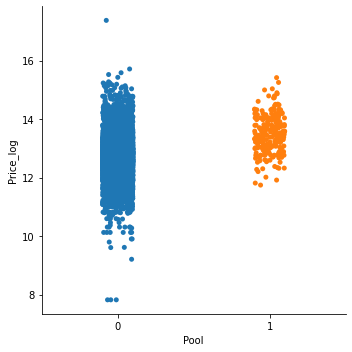

In [429]:
sns.catplot(data=df_pool, x='Pool', y='Price_log')

### naive pool model

In [35]:
X = df_pool[['Pool_int']]
y = df_pool['Price']
y_log = df_pool['Price_log']

In [39]:
from sklearn.linear_model import LinearRegression

easy_modeler(X,y, LinearRegression)
easy_modeler(X,y_log, LinearRegression)

The train score is 0.045090885785685764
The test score is 0.0037509474906985973
The train score is 0.036529537319656136
The test score is 0.026867806898653757


In [40]:
from sklearn.ensemble import RandomForestRegressor

easy_modeler(X,y, RandomForestRegressor)
easy_modeler(X,y_log, RandomForestRegressor)

The train score is 0.04289548393886877
The test score is 0.006084298732547344
The train score is 0.036155172444661154
The test score is 0.02685484867346144


## Exploration of condition

In [238]:
df_condition = df[['Condition', 'Price_log']]

In [241]:
df_condition['Condition'].isna().sum()

2086

In [242]:
df['Condition'].unique()

array(['AS_NEW', 'GOOD', nan, 'TO_RENOVATE', 'Unknown', 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [258]:
def condition_simplify(cond):
    if (cond == np.nan) or (cond == 'Unknown'):
        return 'UNKNOWN'
    # if (cond == 'TO_RENOVATE') or (cond == 'TO_BE_DONE_UP') or (cond == 'TO_RESTORE'):
    #     return 'TO_RENOVATE'
    else:
        return cond

df_condition['Condition_2'] = df_condition['Condition'].apply(condition_simplify)

/var/folders/1j/th1xcyq15k75p76l91zqndh40000gn/T/ipykernel_18716/181534760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['Condition_2'] = df_condition['Condition'].apply(condition_simplify)


<AxesSubplot:xlabel='Price_log', ylabel='Condition'>

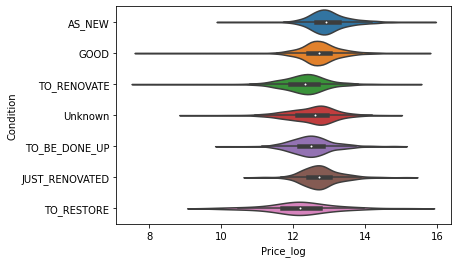

In [246]:
sns.violinplot(data=df_condition, y='Condition', x='Price_log')

<AxesSubplot:xlabel='Price_log', ylabel='Condition_2'>

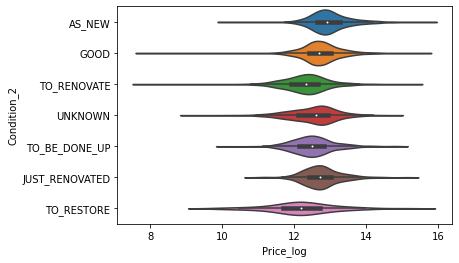

In [259]:
sns.violinplot(data=df_condition, y='Condition_2', x='Price_log')

In [260]:
df_condition.groupby('Condition_2').count()

,Condition,Price_log
Condition_2,,
AS_NEW,1689,1689
GOOD,2736,2736
JUST_RENOVATED,488,488
TO_BE_DONE_UP,1039,1039
TO_RENOVATE,1228,1228
TO_RESTORE,56,56
UNKNOWN,636,636


In [261]:
df[df['Condition'] == 'TO_RESTORE']

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
51,51,Mons,HOUSE,HOUSE,120000.0,residential_sale,2.0,80.0,NaN,False,False,Unknown,Unknown,True,Unknown,2060.0,4,False,TO_RESTORE,11.695247
118,118,Comblain-au-Pont,HOUSE,HOUSE,215000.0,residential_sale,3.0,170.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,True,SOUTH_EAST,432.0,4,False,TO_RESTORE,12.278393
326,326,Sleidinge,HOUSE,HOUSE,220000.0,residential_sale,3.0,NaN,Unknown,False,False,Unknown,Unknown,True,EAST,645.0,NaN,False,TO_RESTORE,12.301383
550,550,ChÃtelineau,HOUSE,HOUSE,25000.0,first_session_with_reserve_price,3.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,115.0,2,NaN,TO_RESTORE,10.126631
622,622,BLÉHARIES,HOUSE,HOUSE,180000.0,residential_sale,3.0,NaN,Unknown,False,True,Unknown,Unknown,Unknown,Unknown,1050.0,3,NaN,TO_RESTORE,12.100712
719,719,Brakel,HOUSE,HOUSE,270000.0,residential_sale,3.0,NaN,INSTALLED,False,True,Unknown,Unknown,True,Unknown,543.0,4,False,TO_RESTORE,12.506177
895,895,BOUFFIOULX,HOUSE,HOUSE,65000.0,residential_sale,2.0,114.0,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,0.0,2,NaN,TO_RESTORE,11.082143
917,917,Herstal,HOUSE,HOUSE,175000.0,residential_sale,3.0,554.0,NaN,False,False,Unknown,Unknown,True,Unknown,425.0,3,False,TO_RESTORE,12.072541
1400,1400,WÉPION,HOUSE,HOUSE,220000.0,residential_sale,3.0,150.0,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,169.0,3,NaN,TO_RESTORE,12.301383
1424,1424,Fosses-la-Ville,HOUSE,HOUSE,170000.0,residential_sale,0.0,NaN,Unknown,False,False,Unknown,Unknown,True,Unknown,1447.0,4,False,TO_RESTORE,12.043554


In [283]:
df_condition_dummy = pd.get_dummies(data=df_condition['Condition_2'])
df_condition_dummy = df_condition_dummy.drop(columns=['UNKNOWN'])
df_condition_dummy.head()

,AS_NEW,GOOD,JUST_RENOVATED,TO_BE_DONE_UP,TO_RENOVATE,TO_RESTORE
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [267]:
X = df_condition_dummy
y = df_condition['Price_log']

easy_modeler(X,y, LinearRegression)

The train score is 0.09428330955866382
The test score is 0.10019000280180168


In [274]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

## exploration of Kitchen

In [275]:
df_kitchen = df[['Kitchen', 'Price_log']]

In [276]:
df_kitchen['Kitchen'].unique()

array(['Unknown', 'SEMI_EQUIPPED', 'INSTALLED', 'HYPER_EQUIPPED', nan,
       'USA_HYPER_EQUIPPED', 'NOT_INSTALLED', 'USA_INSTALLED',
       'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'], dtype=object)

In [277]:
def kitchen(cond):
    if cond==np.nan or cond == 'Unknown':
        return 'UNKNOWN'
    else:
        return cond

df_kitchen['Kitchen'] = df_kitchen['Kitchen'].apply(kitchen)


/var/folders/1j/th1xcyq15k75p76l91zqndh40000gn/T/ipykernel_18716/2263776210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kitchen['Kitchen'] = df_kitchen['Kitchen'].apply(kitchen)


In [279]:
df_kitchen.groupby('Kitchen').count()

,Price_log
Kitchen,
HYPER_EQUIPPED,816
INSTALLED,3390
NOT_INSTALLED,427
SEMI_EQUIPPED,1024
UNKNOWN,2991
USA_HYPER_EQUIPPED,302
USA_INSTALLED,166
USA_SEMI_EQUIPPED,46
USA_UNINSTALLED,2


<AxesSubplot:xlabel='Price_log', ylabel='Kitchen'>

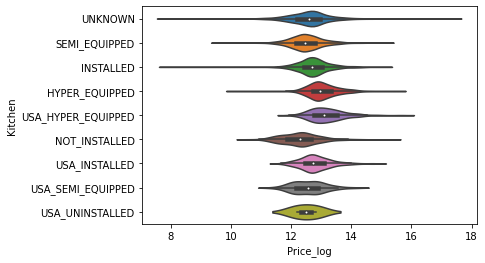

In [278]:
sns.violinplot(data=df_kitchen, x='Price_log', y='Kitchen')

In [285]:
df_kitchen_dummy = pd.get_dummies(data=df_kitchen['Kitchen'])
df_kitchen_dummy = df_kitchen_dummy.drop(columns=['UNKNOWN'])
df_kitchen_dummy.head()

,HYPER_EQUIPPED,INSTALLED,NOT_INSTALLED,SEMI_EQUIPPED,USA_HYPER_EQUIPPED,USA_INSTALLED,USA_SEMI_EQUIPPED,USA_UNINSTALLED
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [286]:
X = df_kitchen_dummy
y = df_kitchen['Price_log']

easy_modeler(X,y, LinearRegression)

The train score is 0.08936604334058385
The test score is 0.07180809677151345


## Exploration Furnished, Open fireplace Terrace and Garden

In [332]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

In [335]:
print(df['Furnished'].unique())
print(df['Open fireplace'].unique())
print(df['Terrace'].unique())
print(df['Garden'].unique())

[False nan True]
[False  True]
['True' 'Unknown']
['True' 'Unknown']


In [341]:
def present(cond):
    if cond == True:
        return 1
    else:
        return 0

def present_2(cond):
    if cond == 'True':
        return 1
    else:
        return 0

In [342]:
df_bool = pd.DataFrame()
df_bool['Furnished'] = df['Furnished'].apply(present)
df_bool['Open fireplace'] = df['Open fireplace'].apply(present)
df_bool['Terrace'] = df['Terrace'].apply(present_2)
df_bool['Garden'] = df['Garden'].apply(present_2)

In [343]:
df_bool

,Furnished,Open fireplace,Terrace,Garden
0,0,0,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,1
4,0,0,1,0
...,...,...,...,...
10077,0,0,0,0
10078,0,0,0,0
10079,0,0,1,1
10080,0,0,0,0


In [344]:
df_bool.sum()

Furnished          139
Open fireplace     621
Terrace           5101
Garden            4348
dtype: int64

# Component analysis

In [304]:
df_combine = df_pool[['Pool_int']]
df_combine = df_combine.join(df_kitchen_dummy, how='inner')
df_combine = df_combine.join(df_bedrooms[['Number of bedrooms']], how='inner')


In [305]:
df_combine.isna().sum()

Pool_int              0
HYPER_EQUIPPED        0
INSTALLED             0
NOT_INSTALLED         0
SEMI_EQUIPPED         0
USA_HYPER_EQUIPPED    0
USA_INSTALLED         0
USA_SEMI_EQUIPPED     0
USA_UNINSTALLED       0
Number of bedrooms    0
dtype: int64

In [307]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(df_combine)
print(pca.explained_variance_ratio_)

[0.96594402 0.01606022 0.00631749]


In [313]:
df_combine

,Pool_int,HYPER_EQUIPPED,INSTALLED,NOT_INSTALLED,SEMI_EQUIPPED,USA_HYPER_EQUIPPED,USA_INSTALLED,USA_SEMI_EQUIPPED,USA_UNINSTALLED,Number of bedrooms
0,0,0,0,0,0,0,0,0,0,3.0
1,0,0,0,0,0,0,0,0,0,4.0
2,0,0,0,0,1,0,0,0,0,5.0
3,0,0,0,0,0,0,0,0,0,0.0
4,0,0,1,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...
10077,0,0,0,0,0,0,0,0,0,3.0
10078,0,0,1,0,0,0,0,0,0,2.0
10079,1,0,1,0,0,0,0,0,0,6.0
10080,0,0,0,0,0,0,0,0,0,4.0


In [318]:
df_pca = pd.DataFrame(pca.transform(df_combine),index=df_combine.index, columns= ['COL_1', 'COL_2', 'COL_3'])

In [319]:
df_pca.head()

,COL_1,COL_2,COL_3
0,-0.501719,0.287165,-0.074344
1,0.498277,0.289242,-0.073274
2,1.497413,0.509714,0.768977
3,-3.501705,0.280932,-0.077552
4,-0.499636,-0.673647,0.029020


# Combined Model

In [326]:
from sklearn.metrics import r2_score

def r2_exp(y_true, y_pred):
    return r2_score(np.exp(y_true), np.exp(y_pred))

In [430]:
df_1 = df_simple[['Surface_log', 'Living_log']]
df_2 = df_bedrooms[['Number of bedrooms']]
df_3 = df_property_dummies
df_4 = df_pool[['Pool']]
df_5 = df_location[['latitude', 'longitude']]
df_6 = df_condition_dummy
df_7 = df_kitchen_dummy
df_target = df[['Price', 'Price_log']]

df_final = df_1.join(df_2, how='inner')
df_final = df_final.join(df_3, how='inner')
df_final = df_final.join(df_4, how='inner')
df_final = df_final.join(df_5, how='inner')
df_final = df_final.join(df_6, how='inner')
df_final = df_final.join(df_7, how='inner')
#df_final = df_final.join(df_pca, how='inner')
df_final = df_final.join(df_bool, how='inner')
df_final = df_final.join(df_target, how='inner')

X = df_final.drop(columns=['Price', 'Price_log'])
y = df_final['Price_log']

In [431]:
X.columns

Index(['Surface_log', 'Living_log', 'Number of bedrooms', 'APARTMENT_BLOCK',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'HOUSE', 'MANOR_HOUSE', 'MANSION',
       'MIXED_USE_BUILDING', 'OTHER_PROPERTY', 'TOWN_HOUSE', 'VILLA', 'Pool',
       'latitude', 'longitude', 'AS_NEW', 'GOOD', 'JUST_RENOVATED',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'HYPER_EQUIPPED',
       'INSTALLED', 'NOT_INSTALLED', 'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED',
       'USA_INSTALLED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED', 'Furnished',
       'Open fireplace', 'Terrace', 'Garden'],
      dtype='object')

In [432]:
easy_modeler(X,y, LinearRegression)

The train score is 0.6279301674942563
The test score is 0.6755375441535074


In [347]:
from sklearn.linear_model import Ridge

easy_modeler(X,y, Ridge)

The train score is 0.6331274999844576
The test score is 0.6514450921900229


In [433]:
easy_modeler(X,y, RandomForestRegressor)

The train score is 0.9640586655651175
The test score is 0.7766174055692745


## Ridge and lasso

In [410]:
from sklearn.linear_model import LinearRegression

ridge = LinearRegression()
ridge.fit(X_train, y_train)

train_score =ridge.score(X_train, y_train)
test_score =ridge.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')



The train score is 0.6420692653010992
The test score is 0.609481335468073


In [336]:
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print(r2_exp(y_train_pred, y_train))
print(r2_exp(y_pred, y_test))

-0.5154705790370295
-0.37561461283388575


In [341]:
np.exp(np.abs(np.log(np.exp(y_pred)/np.exp(y_test))).mean())

1.3663289153349851

## Gradient booster

In [444]:
from sklearn.ensemble import GradientBoostingRegressor

easy_modeler(X,y, GradientBoostingRegressor)



The train score is 0.8029518327711815
The test score is 0.7138028127054068


In [454]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=76)

In [455]:
X_train.columns

Index(['Surface_log', 'Living_log', 'Number of bedrooms', 'APARTMENT_BLOCK',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'HOUSE', 'MANOR_HOUSE', 'MANSION',
       'MIXED_USE_BUILDING', 'OTHER_PROPERTY', 'TOWN_HOUSE', 'VILLA', 'Pool',
       'latitude', 'longitude', 'AS_NEW', 'GOOD', 'JUST_RENOVATED',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'HYPER_EQUIPPED',
       'INSTALLED', 'NOT_INSTALLED', 'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED',
       'USA_INSTALLED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED', 'Furnished',
       'Open fireplace', 'Terrace', 'Garden'],
      dtype='object')

In [456]:
grb_easy = GradientBoostingRegressor(learning_rate=0.2)

grb_easy.fit(X_train, y_train)

train_score = grb_easy.score(X_train, y_train)
test_score = grb_easy.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.8404518790708707
The test score is 0.744448504268955


In [356]:
from sklearn.model_selection import GridSearchCV, train_test_split

gbr = GradientBoostingRegressor()
params = {
    'learning_rate': [0., 0.01, 0.001],
    'n_estimators': [10, 100, 500],
    'max_depth': [3,9,27,81],

}

rclf = GridSearchCV(gbr, params)
rclf.fit(X_train, y_train)

train_score = rclf.score(X_train, y_train)
test_score = rclf.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.8810677490415528
The test score is 0.7597528255578442


In [358]:
rclf.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [397]:
np.linspace(0.01 , 0.2, 20),

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),)

In [446]:
from sklearn.model_selection import GridSearchCV, train_test_split

gbr = GradientBoostingRegressor()
params = {
    'learning_rate': np.linspace(0.01 , 0.2, 20),
    'n_estimators': [100]

}

rrclf = GridSearchCV(gbr, params)
rrclf.fit(X_train, y_train)

train_score = rrclf.score(X_train, y_train)
test_score = rrclf.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.8404518790708707
The test score is 0.7445311857906177


In [447]:
rrclf.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [448]:
best_model = rrclf.best_estimator_

## Random forest regressor

In [351]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=76)

In [354]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50,100,200,500],
    'max_depth': [10,20,40,50,60,70],
    'min_samples_split': [5,10,50],
    'min_samples_leaf': [1,2,5],
}

model = RandomForestRegressor(n_jobs=-1)
clf = RandomizedSearchCV(model, params,n_iter=50)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.9512258911921225
The test score is 0.7446568402755327


In [355]:
clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 60}

In [449]:
import joblib

best_model = rclf.best_estimator_

In [465]:
joblib.dump(grb_easy, './model/best_model')

['./model/best_model']

In [221]:
np.exp(best_model.predict(X_test.iloc[1000:1005]))

array([463924.76508837, 376272.12650429, 381919.92574272, 671397.88835532,
       459354.20097694])

In [222]:
df.loc[X_test.iloc[1000:1005].index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
6246,6246,Braine-l'Alleud,HOUSE,HOUSE,425000.0,residential_sale,3.0,183.0,INSTALLED,False,False,True,Unknown,True,SOUTH_WEST,512.0,3,NaN,NaN,12.959844
1920,1920,Eeklo,HOUSE,HOUSE,339000.0,residential_sale,3.0,160.0,INSTALLED,False,False,True,WEST,True,SOUTH_WEST,555.0,5,False,JUST_RENOVATED,12.733755
1628,1628,Aalst,HOUSE,HOUSE,575000.0,residential_sale,3.0,255.0,USA_HYPER_EQUIPPED,NaN,False,True,Unknown,Unknown,Unknown,990.0,4,NaN,GOOD,13.262125
8084,8084,Woluwe-Saint-Pierre,HOUSE,VILLA,1250000.0,residential_sale,4.0,193.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,881.0,4,False,GOOD,14.038654
1676,1676,La Louvière Haine-Saint-Paul,HOUSE,APARTMENT_BLOCK,900000.0,residential_sale,5.0,347.0,Unknown,False,False,True,Unknown,Unknown,Unknown,1479.0,2,False,AS_NEW,13.710150


In [457]:
y_pred = np.exp(grb_easy.predict(X_test))
y_true = df_final.loc[X_test.index]['Price']

In [458]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.6426644845332087

In [459]:
np.abs(y_pred/y_true - 1).mean()

0.21511612276883707

In [460]:
worst = (y_pred/y_true).sort_values()[-20:]
worst_down = (y_pred/y_true).sort_values(ascending=False)[-20:]

In [461]:
worst

4649    1.890029
6392    1.897480
6275    1.899369
8631    1.907639
5985    1.957749
7340    1.969394
3168    2.006645
1595    2.043525
368     2.046019
5529    2.059341
3014    2.090720
3621    2.107166
1001    2.122638
565     2.294936
7394    2.304921
6817    2.461298
2544    2.661075
2193    2.707732
4840    2.786937
6751    6.268007
Name: Price, dtype: float64

In [462]:
df.loc[worst.index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
4649,4649,Heers,HOUSE,EXCEPTIONAL_PROPERTY,699000.0,residential_sale,8.0,800.0,INSTALLED,True,False,Unknown,Unknown,Unknown,Unknown,2000.0,NaN,False,NaN,13.457406
6392,6392,Tinlot,HOUSE,COUNTRY_COTTAGE,310000.0,residential_sale,9.0,765.0,NOT_INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,3504.0,Unknown,NaN,Unknown,12.644328
6275,6275,Dampremy,HOUSE,HOUSE,79000.0,residential_sale,3.0,120.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,86.0,3,NaN,NaN,11.277203
8631,8631,Antwerpen,HOUSE,APARTMENT_BLOCK,494000.0,residential_sale,10.0,447.0,Unknown,False,False,True,EAST,Unknown,Unknown,188.0,2,False,GOOD,13.110291
5985,5985,Berlaar,HOUSE,HOUSE,132000.0,first_session_with_reserve_price,3.0,112.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,295.0,2,NaN,TO_BE_DONE_UP,11.790557
7340,7340,Trooz,HOUSE,MIXED_USE_BUILDING,99000.0,residential_sale,3.0,284.0,NOT_INSTALLED,False,False,Unknown,Unknown,True,Unknown,315.0,2,False,TO_RENOVATE,11.502875
3168,3168,Lebbeke,HOUSE,HOUSE,200000.0,first_session_with_reserve_price,3.0,202.0,INSTALLED,NaN,False,Unknown,Unknown,Unknown,Unknown,1461.0,4,NaN,NaN,12.206073
1595,1595,Putte,HOUSE,HOUSE,205000.0,first_session_with_reserve_price,3.0,242.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,330.0,3,NaN,NaN,12.230765
368,368,Hoeselt,HOUSE,APARTMENT_BLOCK,196900.0,residential_sale,5.0,205.0,SEMI_EQUIPPED,False,False,True,Unknown,True,WEST,162.0,2,NaN,GOOD,12.190451
5529,5529,Liege,HOUSE,APARTMENT_BLOCK,129000.0,residential_sale,5.0,282.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,100.0,2,False,TO_RENOVATE,11.767568


In [463]:
worst_down

2418    0.496688
4697    0.483870
5061    0.482999
4011    0.480572
4654    0.480373
7400    0.473621
7043    0.466404
1741    0.450621
4952    0.439441
7457    0.438195
7453    0.438195
3710    0.432207
1488    0.427905
5247    0.414618
4204    0.394529
2208    0.367716
180     0.347297
176     0.347297
7882    0.283874
9762    0.048658
Name: Price, dtype: float64

In [464]:
df.loc[worst_down.index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
2418,2418,Halle,HOUSE,HOUSE,599000.0,residential_sale,3.0,118.0,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,1820.0,4,NaN,NaN,13.303017
4697,4697,Ath,HOUSE,VILLA,319000.0,residential_sale,2.0,109.0,NOT_INSTALLED,False,False,Unknown,Unknown,True,Unknown,465.0,4,False,TO_RENOVATE,12.672946
5061,5061,Herk-de-Stad,HOUSE,HOUSE,638500.0,residential_sale,3.0,202.0,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,2700.0,3,NaN,TO_RENOVATE,13.366877
4011,4011,Rhode-Saint-Genèse,HOUSE,EXCEPTIONAL_PROPERTY,2650000.0,residential_sale,4.0,440.0,Unknown,NaN,False,True,Unknown,True,Unknown,2533.0,4,True,AS_NEW,14.790070
4654,4654,Leuven,HOUSE,HOUSE,770000.0,residential_sale,4.0,110.0,INSTALLED,True,False,True,Unknown,Unknown,Unknown,54.0,NaN,False,NaN,13.554146
7400,7400,Brugge,HOUSE,HOUSE,775000.0,residential_sale,3.0,238.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,78.0,Unknown,False,Unknown,13.560618
7043,7043,WÉPION,HOUSE,HOUSE,495000.0,residential_sale,3.0,160.0,INSTALLED,False,False,Unknown,Unknown,True,WEST,3815.0,4,NaN,TO_RENOVATE,13.112313
1741,1741,Brasschaat,HOUSE,VILLA,2215000.0,residential_sale,4.0,341.0,HYPER_EQUIPPED,False,False,True,Unknown,Unknown,Unknown,1973.0,4,NaN,AS_NEW,14.610763
4952,4952,Braine-le-Comte,HOUSE,HOUSE,350000.0,residential_sale,2.0,110.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,175.0,2,NaN,NaN,12.765688
7457,7457,Poppel,HOUSE,HOUSE,650000.0,residential_sale,4.0,225.0,INSTALLED,False,True,Unknown,Unknown,True,NORTH,1483.0,4,NaN,AS_NEW,13.384728


In [409]:
np.exp(best_model.predict(X_test.loc[worst_down.index]))

array([389248.89387156, 374955.52131689, 367463.08892892, 308843.85651807,
       308843.85651807, 421622.98906982, 296482.83644444, 332409.23206805,
       157750.27052497, 188718.74489968, 138135.22262969, 958770.27529421,
       211019.41110278, 294477.12390017, 567236.10923777, 630825.27564437,
       630825.27564437, 545457.91375159, 865319.91923779, 125110.33712805])

In [380]:
df_final.columns

Index(['Surface_log', 'Living_log', 'Number of bedrooms', 'APARTMENT_BLOCK',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'HOUSE', 'MANOR_HOUSE', 'MANSION',
       'MIXED_USE_BUILDING', 'OTHER_PROPERTY', 'TOWN_HOUSE', 'VILLA', 'Price',
       'Price_log'],
      dtype='object')

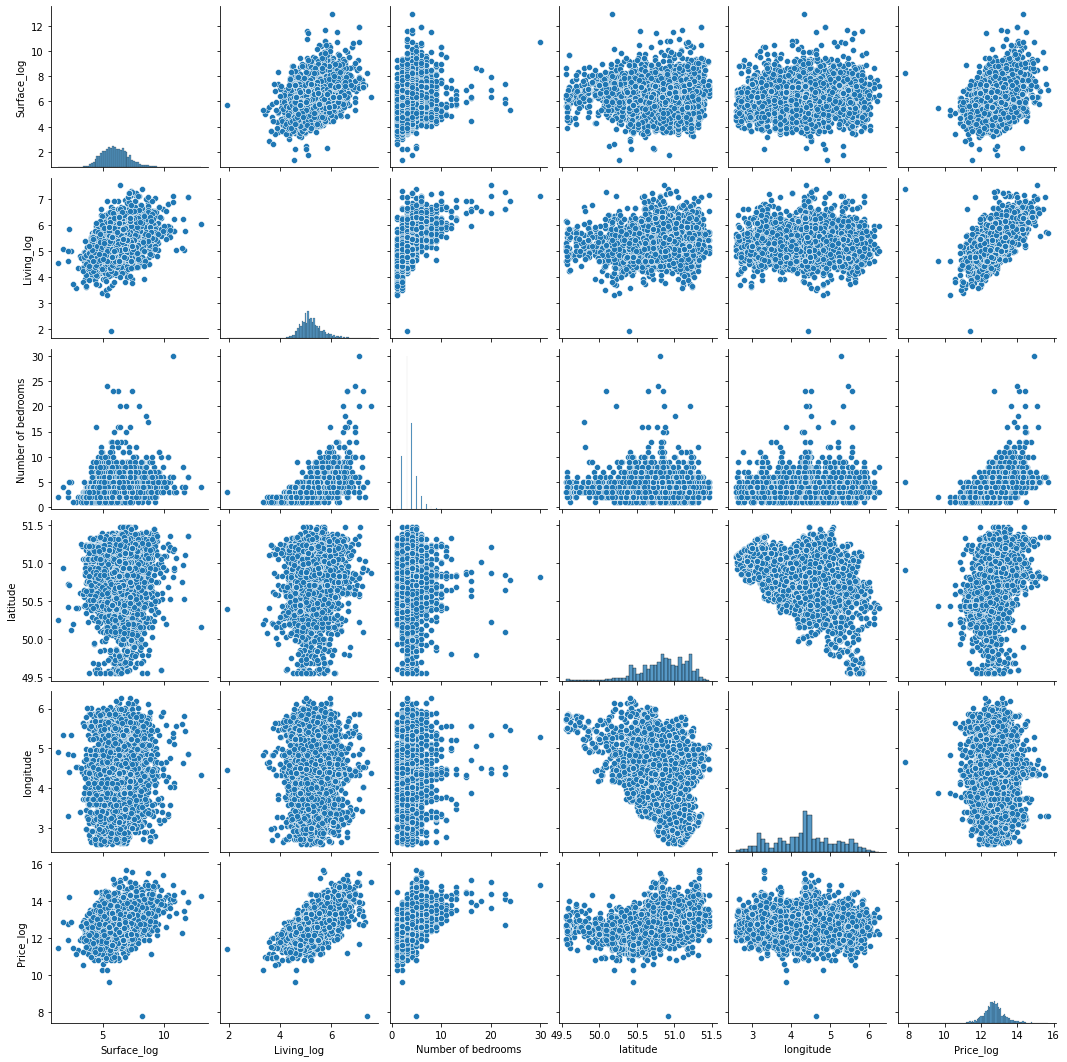

In [205]:
sns.pairplot(df_final[['Surface_log', 'Living_log', 'Number of bedrooms', 
       'latitude', 'longitude', 'Price_log']])

In [231]:
best_model.feature_importances_

array([1.24863752e-01, 4.96083441e-01, 3.93803147e-02, 2.24054173e-03,
       5.15229378e-04, 1.47462509e-05, 4.11837681e-04, 5.30929996e-04,
       2.08360795e-03, 2.45497191e-04, 3.21315564e-02, 2.31626351e-04,
       1.48934092e-03, 4.52215645e-03, 1.58669850e-04, 4.99295606e-04,
       1.21074372e-02, 1.75261051e-01, 1.07228969e-01])

In [233]:
feature_dict = {}
for col, imp in zip(best_model.feature_names_in_, best_model.feature_importances_):
    feature_dict[col] = imp

feature_dict


{'Surface_log': 0.12486375190836523,
 'Living_log': 0.496083441317345,
 'Number of bedrooms': 0.03938031469679377,
 'APARTMENT_BLOCK': 0.0022405417251640646,
 'BUNGALOW': 0.0005152293780701691,
 'CASTLE': 1.4746250902795636e-05,
 'CHALET': 0.0004118376813692726,
 'COUNTRY_COTTAGE': 0.0005309299962332479,
 'EXCEPTIONAL_PROPERTY': 0.0020836079500196098,
 'FARMHOUSE': 0.00024549719140233865,
 'HOUSE': 0.03213155641223704,
 'MANOR_HOUSE': 0.00023162635107594237,
 'MANSION': 0.0014893409228359808,
 'MIXED_USE_BUILDING': 0.00452215644799742,
 'OTHER_PROPERTY': 0.00015866984951337345,
 'TOWN_HOUSE': 0.0004992956057889572,
 'VILLA': 0.012107437182856519,
 'latitude': 0.17526105062543898,
 'longitude': 0.10722896850659037}

In [237]:
pd.Series(feature_dict).sort_values(ascending=False)

Living_log              0.496083
latitude                0.175261
Surface_log             0.124864
longitude               0.107229
Number of bedrooms      0.039380
HOUSE                   0.032132
VILLA                   0.012107
MIXED_USE_BUILDING      0.004522
APARTMENT_BLOCK         0.002241
EXCEPTIONAL_PROPERTY    0.002084
MANSION                 0.001489
COUNTRY_COTTAGE         0.000531
BUNGALOW                0.000515
TOWN_HOUSE              0.000499
CHALET                  0.000412
FARMHOUSE               0.000245
MANOR_HOUSE             0.000232
OTHER_PROPERTY          0.000159
CASTLE                  0.000015
dtype: float64

In [466]:
X_train.columns

Index(['Surface_log', 'Living_log', 'Number of bedrooms', 'APARTMENT_BLOCK',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'HOUSE', 'MANOR_HOUSE', 'MANSION',
       'MIXED_USE_BUILDING', 'OTHER_PROPERTY', 'TOWN_HOUSE', 'VILLA', 'Pool',
       'latitude', 'longitude', 'AS_NEW', 'GOOD', 'JUST_RENOVATED',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'HYPER_EQUIPPED',
       'INSTALLED', 'NOT_INSTALLED', 'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED',
       'USA_INSTALLED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED', 'Furnished',
       'Open fireplace', 'Terrace', 'Garden'],
      dtype='object')

In [468]:
X_train.iloc[1]

Surface_log              4.262680
Living_log               5.111988
Number of bedrooms       9.000000
APARTMENT_BLOCK          0.000000
BUNGALOW                 0.000000
CASTLE                   0.000000
CHALET                   0.000000
COUNTRY_COTTAGE          0.000000
EXCEPTIONAL_PROPERTY     0.000000
FARMHOUSE                0.000000
HOUSE                    1.000000
MANOR_HOUSE              0.000000
MANSION                  0.000000
MIXED_USE_BUILDING       0.000000
OTHER_PROPERTY           0.000000
TOWN_HOUSE               0.000000
VILLA                    0.000000
Pool                     0.000000
latitude                51.208553
longitude                3.226772
AS_NEW                   0.000000
GOOD                     0.000000
JUST_RENOVATED           0.000000
TO_BE_DONE_UP            0.000000
TO_RENOVATE              0.000000
TO_RESTORE               0.000000
HYPER_EQUIPPED           0.000000
INSTALLED                0.000000
NOT_INSTALLED            0.000000
SEMI_EQUIPPED 

In [469]:
df_final

,Surface_log,Living_log,Number of bedrooms,APARTMENT_BLOCK,BUNGALOW,CASTLE,CHALET,COUNTRY_COTTAGE,EXCEPTIONAL_PROPERTY,FARMHOUSE,...,USA_HYPER_EQUIPPED,USA_INSTALLED,USA_SEMI_EQUIPPED,USA_UNINSTALLED,Furnished,Open fireplace,Terrace,Garden,Price,Price_log
0,5.476464,4.867534,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,296607.0,12.600163
2,7.047517,5.298317,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,299000.0,12.608199
3,6.210600,5.598422,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,300000.0,12.611538
4,5.105945,4.905275,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,195000.0,12.180755
5,5.560682,4.852030,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,175000.0,12.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072,5.549076,5.905362,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,299000.0,12.608199
10073,6.336826,4.634729,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,225000.0,12.323856
10076,6.732211,4.787492,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,280000.0,12.542545
10079,7.244228,6.272877,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1650000.0,14.316286


In [471]:
df_final.to_csv('./data/house_data.csv')